<a href="https://colab.research.google.com/github/wayne1123/Topic/blob/master/k_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Do k-NN with MNIST data 

#### For classification tasks - with labels

$p(y=c|x, D, K) = \frac{1}{K} \sum_{i \in N_K(x, D)} {\mathbb{I}(y_i = c)}$

where $N_K(x, D)$ stands for the K-nearest neighbours within $D$, and $x, D, K$ are given.

Then, find the largest probability for the given test point





#### Preprocessing

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
x_train /= 255
x_test /= 255


#### Classification

In [0]:
class KNNC:
  def __init__(self):
    self.xtrain = x_train.reshape(-1,28,28)
    self.xtest = x_test.reshape(-1,28,28)
    self.ytrain = y_train
    self.ytest = y_test
  
  def metric(self, x, y):
    return np.mean(np.abs(x-y),(1,2))
  
  def pred(self, test, K=5):
    distances = np.mean(np.abs(test - self.xtrain),(1,2))
    idxs = np.argsort(distances)[0:K]
    pred = self.ytrain[idxs]
    idx, counts = np.unique(pred, return_counts=True)
    return idx[np.argmax(counts)]
  
  def pred_test(self, K=5):
    idxs = np.random.choice(self.xtest.shape[0], 100)
    pred_out = np.zeros((len(idxs)))
    test = self.xtest[idxs]
    for i, y in enumerate(test):
      #print(y.shape)
      pred_out[i] = self.pred(y, K)
    acc = (self.ytest[idxs] == pred_out)
    return np.mean(acc)

In [0]:
k = KNNC()

In [0]:
accs = []
for j in range(1,10):
  acc = k.pred_test(K=j)
  accs.append(acc)

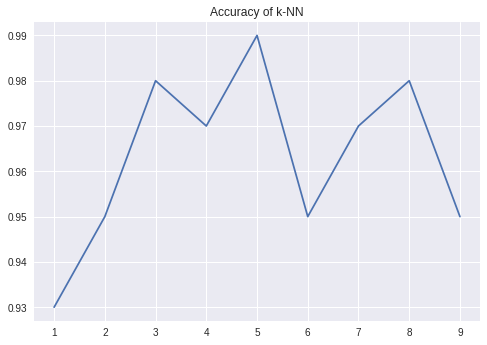

In [17]:
plt.title("Accuracy of k-NN")
plt.plot(np.arange(1,10),accs)